In [1]:
import hoomd
import hoomd.jit
import hoomd.hpmc
import ex_render
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [2]:
hoomd.context.initialize('--mode=cpu');
system = hoomd.init.create_lattice(unitcell=hoomd.lattice.sq(a=1.5), n=8);
mc = hoomd.hpmc.integrate.convex_polygon(seed=415236, d=0.3, a=0.4);
# verts =  [(-0.5, 0.5), (-0.5, -0.5), (0.5,-0.5), (0.5, 0.5)] # square
verts =  [(-0.5, 0.217), (-0.75, -0.217), (0.75,-0.217), (0.5, 0.217)] # trapezoids
mc.shape_param.set('A', vertices=verts);

HOOMD-blue 2.3.5 DOUBLE HPMC_MIXED TBB SSE SSE2 SSE3 
Compiled: 10/08/2018
Copyright 2009-2018 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
-----
You are using HPMC. Please cite the following:
* J A Anderson, M E Irrgang, and S C Glotzer. "Scalable Metropolis Monte Carlo
  for simulation of hard shapes", Computer Physics Communications 204 (2016) 21
  --30
-----
HOOMD-blue is running on the CPU
notice(2): Group "all" created containing 64 particles


In [7]:
#square_well = """float rsq = dot(r_ij, r_ij);
#                    if (rsq < 1.21f)
#                        return -1.0f;
#                    else
#                        return 0.0f;
#              """
#
#patch = hoomd.jit.patch.user(mc=mc, r_cut=1.1, code=square_well)

In [3]:
log1 = hoomd.analyze.log(filename="log-output.log",
                         quantities=['lx', 'ly', 'xy', 'potential_energy'],
                         period=100,
                         overwrite=True);

In [4]:
d = hoomd.dump.gsd("trajectory.gsd",
                   period=1000,
                   group=hoomd.group.all(),
                   overwrite=True);
hoomd.run(10000);

** starting run **
Time 00:00:05 | Step 10000 / 10000 | TPS 6616.17 | ETA 00:00:00
Average TPS: 6612.49
---------
notice(2): -- HPMC stats:
notice(2): Average translate acceptance: 0.714655
notice(2): Average rotate acceptance:    0.840619
notice(2): Trial moves per second:        1.69104e+06
notice(2): Overlap checks per second:     3.92758e+07
notice(2): Overlap checks per trial move: 23.2258
notice(2): Number of overlap errors:      0
** run complete **


In [5]:
snapshot = hoomd.data.gsd_snapshot('trajectory.gsd',frame=0)
ex_render.render_polygon_frame(snapshot, verts)

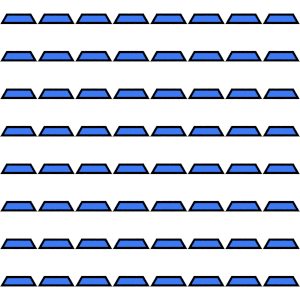

In [6]:
# Make a gif
#ex_render.display_movie(lambda x: ex_render.render_polygon_frame(x, verts, Ly=Ly), 'trajectory-disk-volume.gsd', f2='sim.gif')

# Display in Jupyter notebook
ex_render.display_movie(lambda x: ex_render.render_polygon_frame(x, verts), 'trajectory.gsd')

/Users/jennyfothergill/miniconda3/envs/hoomd/lib/python3.6/site-packages/matplotlib/figure.py:2359: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


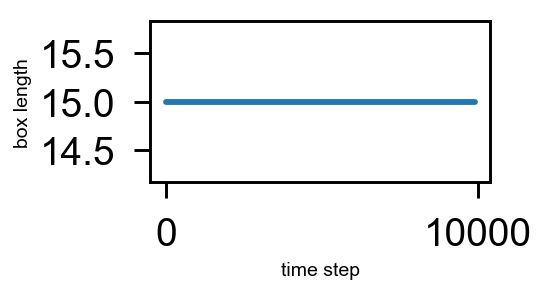

In [8]:
data = numpy.genfromtxt(fname='log-output.log', skip_header=True)
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data[:,0], data[:,1]);
pyplot.ylabel('box length');
pyplot.xlabel('time step');